In [461]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [462]:
#Datasets
df_hist=pd.read_csv("P:\Courses\AI & DS\Projects\.venv\historical_data.csv")
df_gr = pd.read_csv(r"P:\Courses\AI & DS\Projects\.venv\fear_greed_index.csv")

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pallavi Pawaskar\AppData\Local\Temp\ipykernel_10904\4160562510.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_hist=pd.read_csv("P:\Courses\AI & DS\Projects\.venv\historical_data.csv")


In [463]:
df_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [464]:
df_gr.head(100)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
95,1525930200,63,Greed,2018-05-10
96,1526016600,41,Fear,2018-05-11
97,1526103000,44,Fear,2018-05-12
98,1526189400,40,Fear,2018-05-13


In [465]:
df_gr.classification.value_counts()


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [466]:
df_hist["Timestamp IST"]=pd.to_datetime(df_hist["Timestamp IST"],format="%d-%m-%Y %H:%M")

In [467]:
df_hist["Date"] = df_hist["Timestamp IST"].dt.date


In [468]:
df_hist["Time"]=df_hist["Timestamp IST"].dt.time

In [469]:
df_gr = df_gr.rename(columns={"date": "Date"})


In [470]:
df_hist["Date"] = pd.to_datetime(df_hist["Timestamp IST"]).dt.normalize()


In [471]:
df_gr.head()

,timestamp,value,classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [472]:
df_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,22:50:00


In [473]:
df_hist["Date"] = pd.to_datetime(df_hist["Date"])
df_gr["Date"]   = pd.to_datetime(df_gr["Date"])

In [474]:
df=df_hist.merge(df_gr,how="inner")
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Time,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,22:50:00,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,22:50:00,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,22:50:00,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,22:50:00,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,22:50:00,1733117400,80,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,15:35:00,1745559000,60,Greed
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,15:35:00,1745559000,60,Greed
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,15:35:00,1745559000,60,Greed
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,15:35:00,1745559000,60,Greed


In [475]:
df.classification.value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

C:\Users\Pallavi Pawaskar\AppData\Local\Temp\ipykernel_10904\184125994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="classification", data=df, order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"], palette="magma")


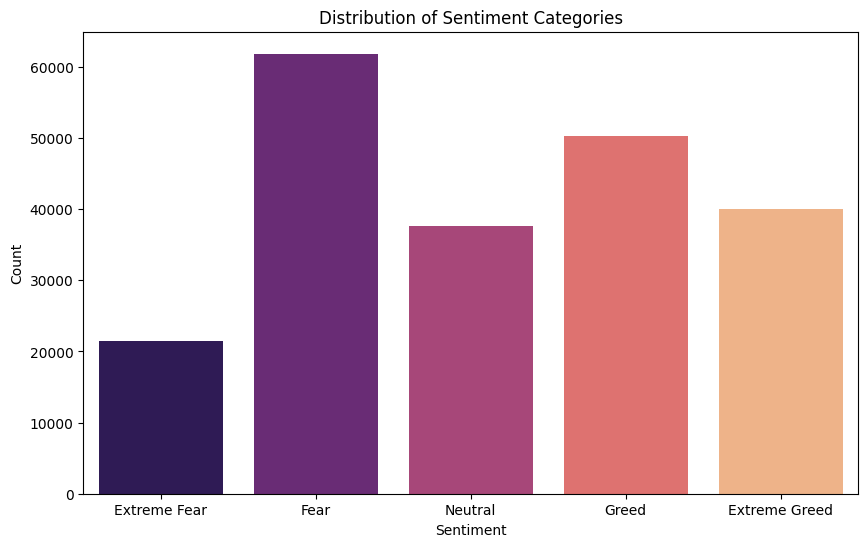

In [ ]:
#plot: Sentiment distribution vs count
plt.figure(figsize=(10,6))
sns.countplot(x="classification", data=df, order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"], palette="magma")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



C:\Users\Pallavi Pawaskar\AppData\Local\Temp\ipykernel_10904\527090749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


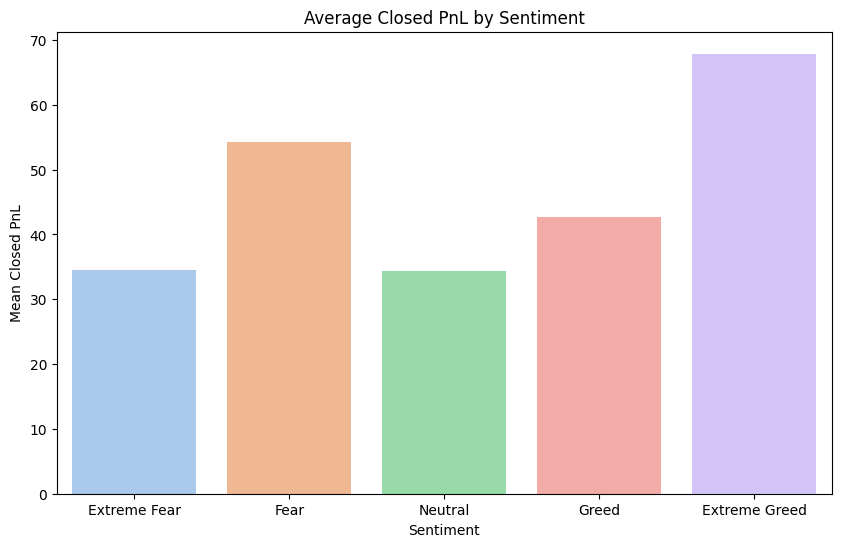

In [496]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="classification", 
    y="Closed PnL", 
    data=df, 
    order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
    estimator=np.mean, 
    errorbar=None, 
    palette="pastel"
)
plt.title("Average Closed PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Mean Closed PnL")
plt.show()



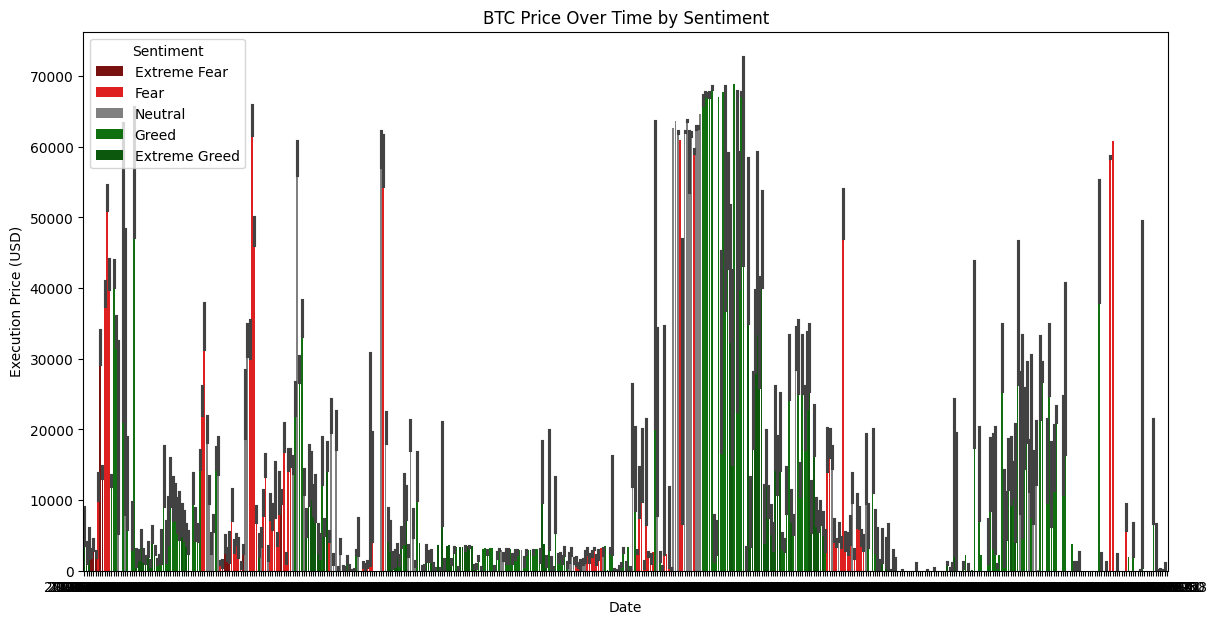

In [478]:
plt.figure(figsize=(14,7))
sns.barplot(x="Date", y="Execution Price", hue="classification", data=df,
             hue_order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
             palette=["darkred","red","gray","green","darkgreen"])
plt.title("BTC Price Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Execution Price (USD)")
plt.legend(title="Sentiment")
plt.show()



C:\Users\Pallavi Pawaskar\AppData\Local\Temp\ipykernel_10904\2093004444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="classification", y="Execution Price", data=df,


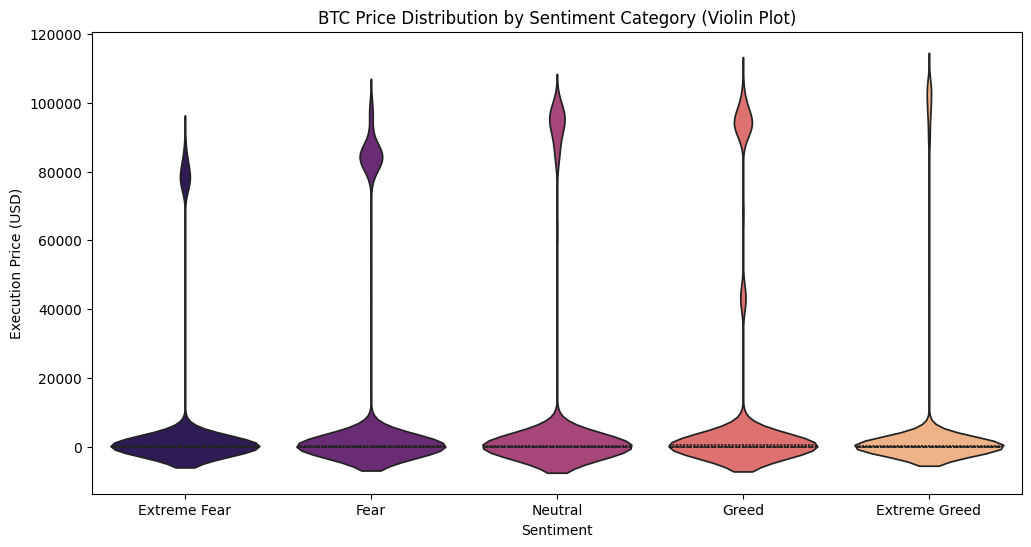

In [479]:
plt.figure(figsize=(12,6))
sns.violinplot(x="classification", y="Execution Price", data=df,
               order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"],
               palette="magma", inner="quartile")
plt.title("BTC Price Distribution by Sentiment Category (Violin Plot)")
plt.xlabel("Sentiment")
plt.ylabel("Execution Price (USD)")
plt.show()


In [480]:
df.groupby("classification")["Size USD"].mean()


classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

In [481]:
df["classification"].value_counts(normalize=True)


classification
Fear             0.292764
Greed            0.238157
Extreme Greed    0.189340
Neutral          0.178422
Extreme Fear     0.101317
Name: proportion, dtype: float64

In [482]:
df.groupby("classification")["Closed PnL"].mean()


classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [483]:
pd.crosstab(df["classification"], df["Side"])


Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


In [484]:
print(df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'Time', 'timestamp', 'value', 'classification'],
      dtype='object')


In [485]:
numeric_df = df.select_dtypes(include=["float64","int64"])

# Compute correlation
corr = numeric_df.corr()
corr

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,timestamp,value
Execution Price,1.000000,-0.017185,0.189859,0.017242,-0.006429,0.125838,0.225266,0.001846,0.130706,0.107228,-0.027558
Size Tokens,-0.017185,1.000000,0.013310,0.044660,0.005067,-0.043754,0.006710,-0.003847,-0.040949,-0.050407,0.023080
Size USD,0.189859,0.013310,1.000000,0.007787,0.123645,0.045223,0.745940,0.000250,0.039762,0.035798,-0.029843
Start Position,0.017242,0.044660,0.007787,1.000000,0.004068,-0.082801,0.010559,0.001164,-0.105488,-0.073483,-0.049619
Closed PnL,-0.006429,0.005067,0.123645,0.004068,1.000000,-0.006916,0.084094,0.003493,-0.009564,-0.003404,0.008121
Order ID,0.125838,-0.043754,0.045223,-0.082801,-0.006916,1.000000,0.039307,0.003901,0.929169,0.982959,-0.561758
Fee,0.225266,0.006710,0.745940,0.010559,0.084094,0.039307,1.000000,0.000944,0.036890,0.030180,-0.026877
Trade ID,0.001846,-0.003847,0.000250,0.001164,0.003493,0.003901,0.000944,1.000000,0.002361,0.003081,-0.006574
Timestamp,0.130706,-0.040949,0.039762,-0.105488,-0.009564,0.929169,0.036890,0.002361,1.000000,0.932900,-0.377565
timestamp,0.107228,-0.050407,0.035798,-0.073483,-0.003404,0.982959,0.030180,0.003081,0.932900,1.000000,-0.478040


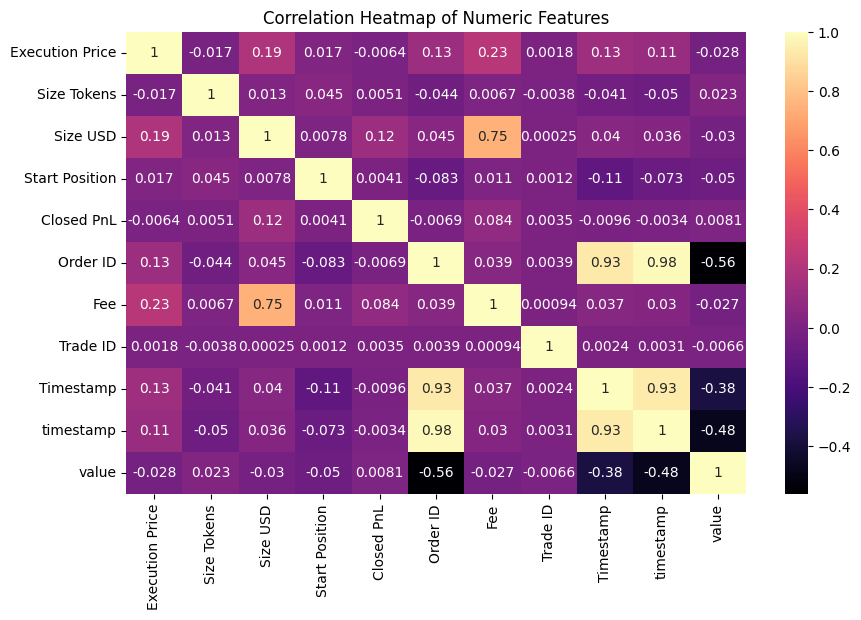

In [486]:

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="magma")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



<Axes: xlabel='Date', ylabel='Execution Price'>

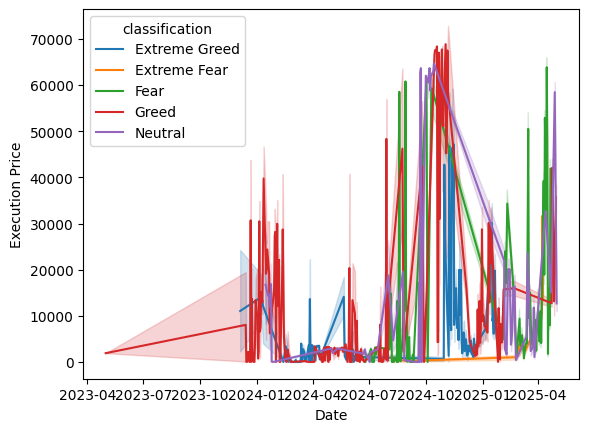

In [487]:
sns.lineplot(x="Date", y="Execution Price", hue="classification", data=df)


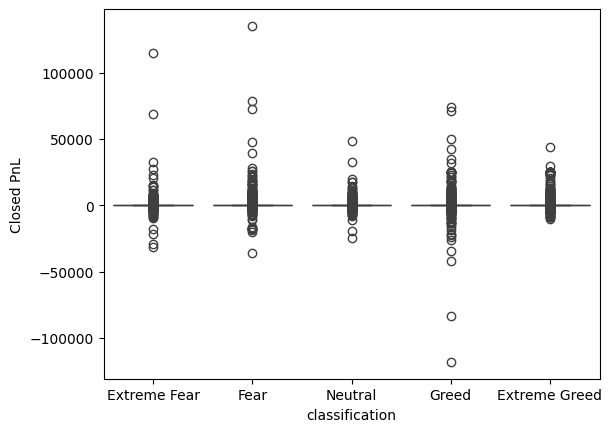

In [488]:
sns.boxplot(x="classification", y="Closed PnL", data=df,
            order=["Extreme Fear","Fear","Neutral","Greed","Extreme Greed"])
plt.show()


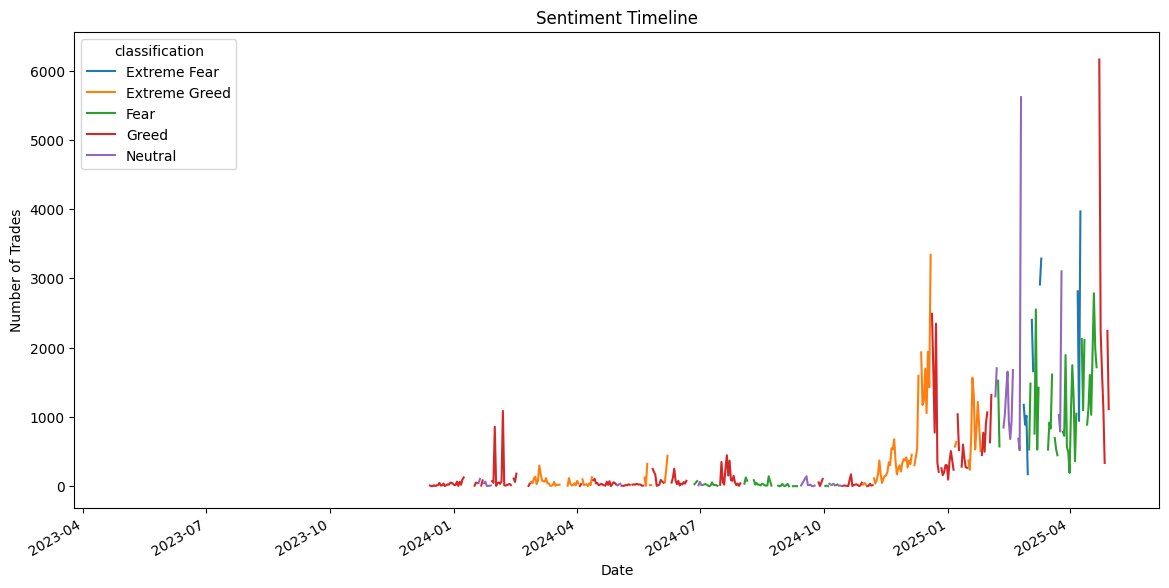

In [489]:
df.groupby(["Date","classification"]).size().unstack().plot(figsize=(14,7))
plt.title("Sentiment Timeline")
plt.ylabel("Number of Trades")
plt.show()


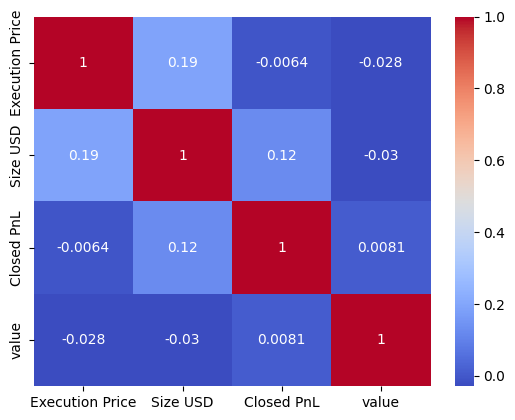

In [490]:
corr = df[["Execution Price","Size USD","Closed PnL","value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
